In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import imutils

In [2]:
img = cv2.imread(r'../Storage/flowers_for_petals/42/image_05698.jpg',-1)

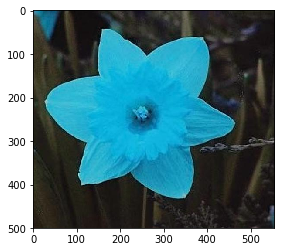

In [3]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RGB 157,125,76  , HSI 36.908977355821015,0.36312849162011185,0.47354497354497355


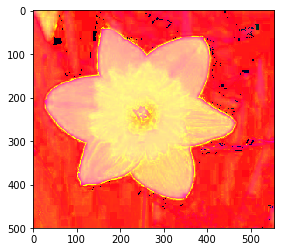

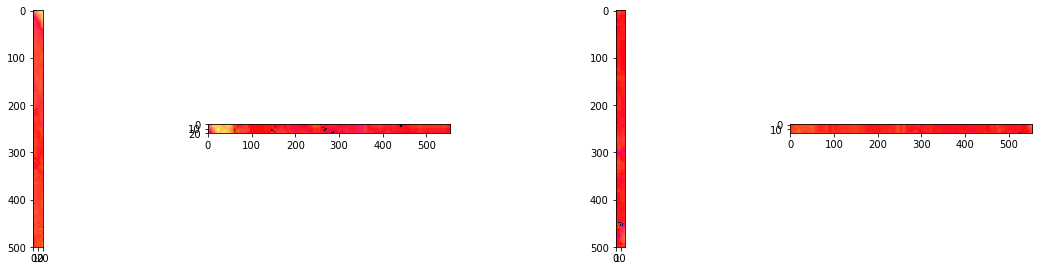

In [4]:
#BGR to HSI
normalized_img = np.zeros(img.shape).astype(float)
normalized_img = cv2.normalize(img.astype(float),normalized_img,0,1,cv2.NORM_MINMAX)
img_converted = np.zeros_like(img,dtype='float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        H = 0
        S = 0
        I = 0
        R = float(normalized_img[i][j][2])
        G = float(normalized_img[i][j][1])
        B = float(normalized_img[i][j][0])
        RGB_sum = R + G + B
        RGB_min = min(R, G, B)
        #print("{} ,{} ,{} , {} , {}".format(R,G,B,RGB_min,RGB_sum))
        I = (1/3) * RGB_sum
        if R == G and G == B:
            H = 0
            S = 0
        else:
            S = 1 - ((3*RGB_min)/RGB_sum)
            if S > 0.9999:
                S = 1
            if S < 0.00001:
                S = 0
                H = 0
            else:
                dividend = (1/2) * ((R-G) + (R-B))
                divisor = math.sqrt(math.pow((R-G),2) + (R-B)*(G-B))
                w = dividend/divisor
                if w > 1:
                    w=1
                elif w < -1:
                    w = -1                    
                H = math.acos(w)
                if B > G:
                    H = (2*math.pi) - H
        img_converted[i][j][0] = H * (180 / math.pi)
        img_converted[i][j][1] = S
        img_converted[i][j][2] = I

plt.imshow(img_converted)
print("RGB {},{},{}  , HSI {},{},{}".format(img[0][0][2],img[0][0][1],img[0][0][0],img_converted[0][0][0]
                                           ,img_converted[0][0][1],img_converted[0][0][2]))
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(img_converted[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(img_converted[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(img_converted[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(img_converted[-20:-1,0:])

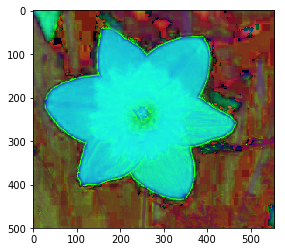

In [5]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(HSV_img)

(array([ 3437.,    70.,    67.,   158.,   105.,   462.,   743.,   193.,
          666.,   420.,   414.,  1023.,   722.,  1189.,   870.,  1269.,
         1566.,  1707.,  2975.,  3087.,  4946.,  5964.,  8872., 23667.,
        54827., 34207., 12799.,  8846.,  8569.,  7337.,  8808.,  7783.,
         8062.,  7426.,  7558.,  7343.,  7528.,  5261.,  6579.,  5840.,
         6018.,  5328.,  4646.,  5560.,  5235.,  4183.,  5440.,  5054.,
         3864.,  5411.,  3826.,  7104.,  2877.,  5974.,  3136.,  6207.,
         2957.,  3243.,  5180.,  2768.,  4091.,  3668.,  3930.,  1443.,
         5626.,  1989.,  4527.,  2914.,  2901.,  2790.,  3506.,  3173.,
         1939.,  3099.,  2866.,  3046.,  2210.,  2558.,  2842.,  1769.,
         4059.,  1952.,  2297.,  3746.,  1866.,  4772.,   771.,  7730.,
         2628.,  1947.,  8890.,  2124.,  2330.,  5608.,  2570.,  7339.,
        11154.,  1778.,  6342.,  3502.,  2451., 12443.,  2026., 18543.,
         3492.,  1488.,  3988.,  1088.,  1292.,  4414.,  5418., 

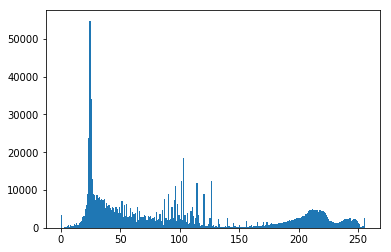

In [6]:
plt.hist(HSV_img.ravel(),256,[0,256])

In [7]:
def Remove_Freq_Values(original_image,filter_size,ratio):
    new_image = np.zeros_like(original_image)
    most_freq = []
    #cv2.calcHist(images, channels, mask, bins, ranges)
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask[0:,-filter_size:-1] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    mask = np.zeros(original_image.shape[:2],np.uint8)
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:filter_size,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[-filter_size:-1,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    #most_freq_ratio = hist[hist.argmax()] / hist.sum()
    print(most_freq)
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            #if hist[original_image[i][j][0]]/hist.sum() < (most_freq_ratio/ratio) and original_hist[original_image[i][j][0]]/original_hist.sum() < 0.05:
            if original_image[i][j][0] not in most_freq:
                new_image[i][j][0] = original_image[i][j][0]
                new_image[i][j][1] = original_image[i][j][1]
                new_image[i][j][2] = original_image[i][j][2]
    if cv2.compare(new_image,original_image,0).all():
        print("Nothing Changed")
    #original_hist = cv2.calcHist([original_image],[0],None,[256],[0,256])
    return new_image

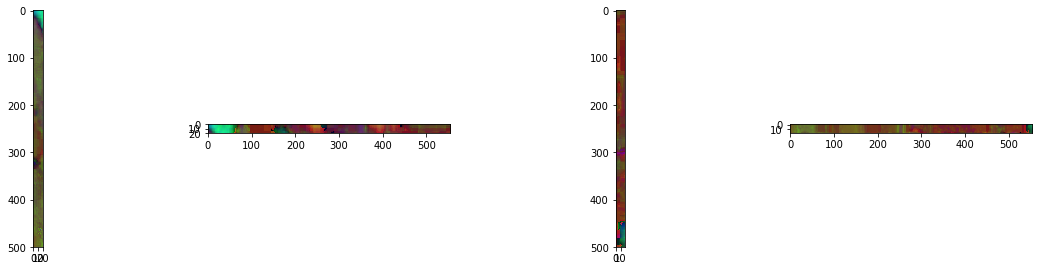

In [8]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(HSV_img[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(HSV_img[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(HSV_img[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(HSV_img[-20:-1,0:])

[87, 90, 93, 95, 96, 98, 99, 101, 103, 87, 90, 93, 95, 96, 98, 101, 103, 114, 120, 126, 87, 90, 96, 101, 103, 110, 120, 126, 140, 101, 103, 109, 113, 114, 126]
[0, 0, 0, 0]
[0, 0, 0, 0]
Nothing Changed
[0, 0, 0, 0]
Nothing Changed


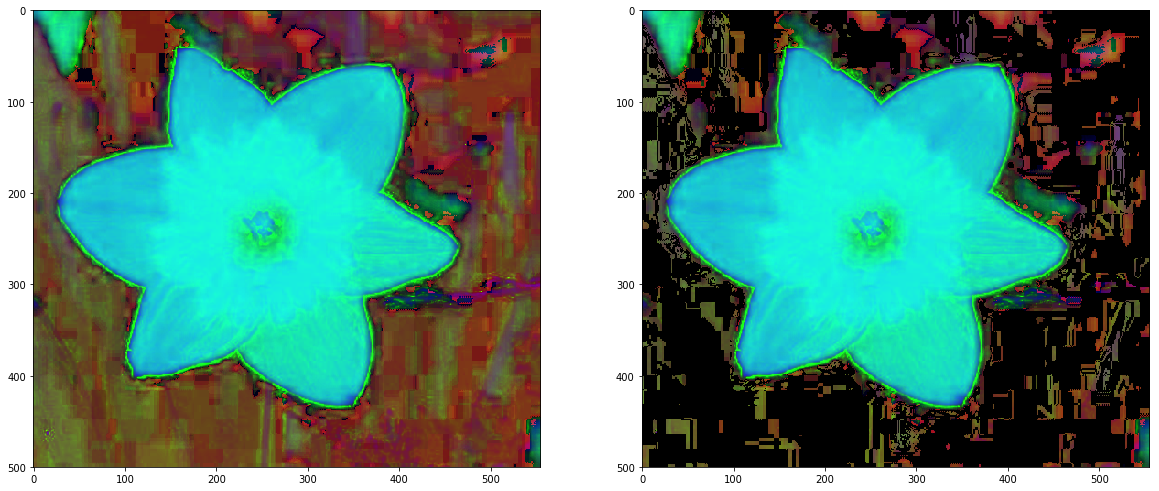

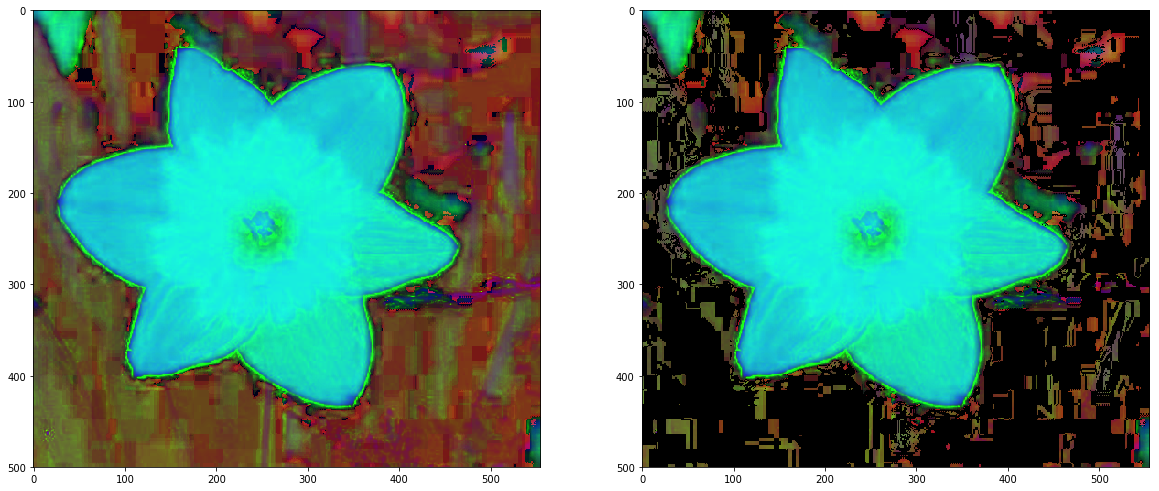

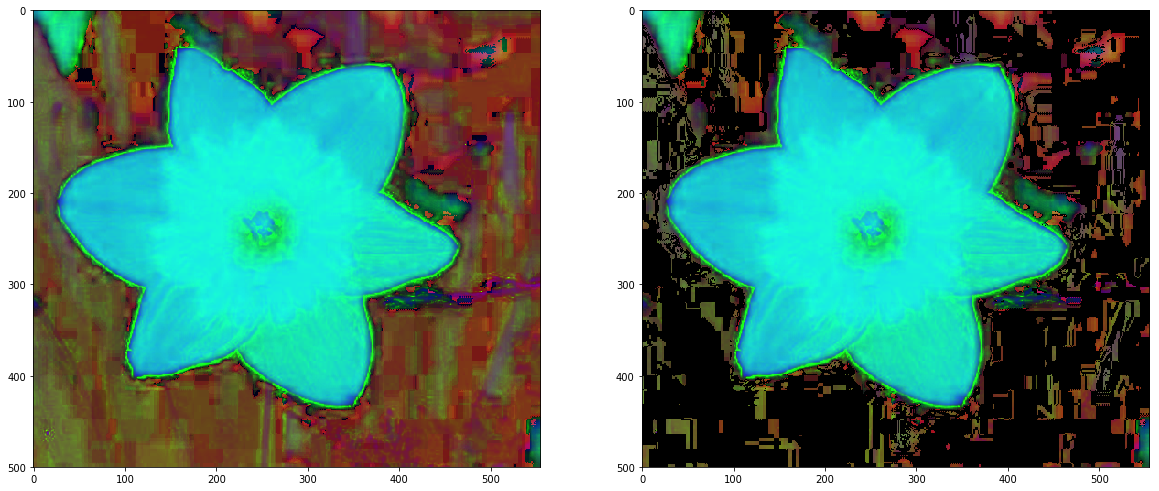

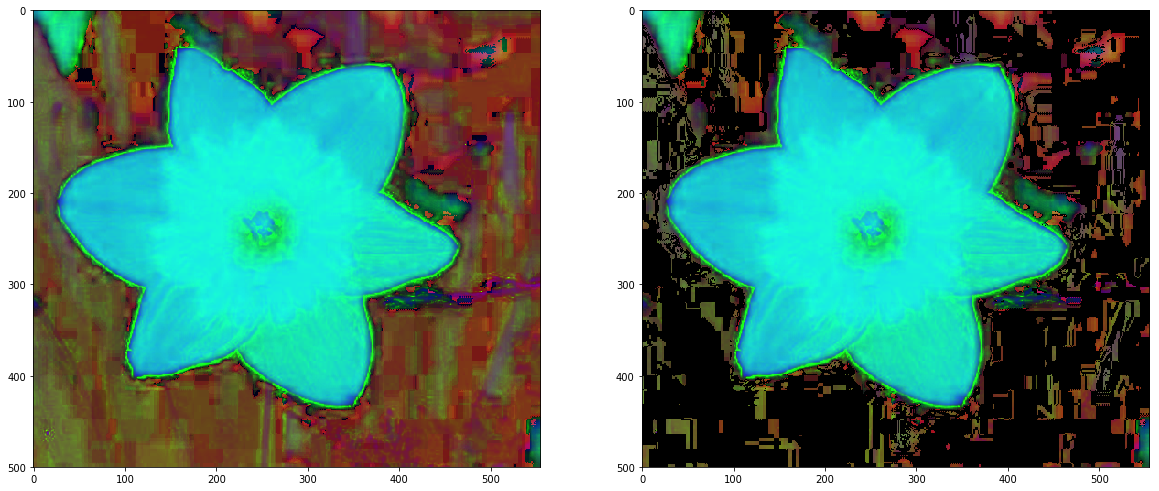

In [9]:
filterd_HSV_filter = np.zeros_like(HSV_img)
filterd_HSV_filter = cv2.normalize(HSV_img,filterd_HSV_filter,0,255,cv2.NORM_MINMAX)
filter_size = 35
for i in range(4):
    ratio = 4
    mask = np.zeros(HSV_img.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    mask[0:,-filter_size:-1] = 1
    mask[0:filter_size,0:] = 1
    mask[-filter_size:-1,0:] = 1
    filterd_HSV_filter = Remove_Freq_Values(filterd_HSV_filter,filter_size,ratio)
    #plt.imshow(filterd_HSV_filter_1)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,1)
    plt.imshow(HSV_img)
    ax = fig.add_subplot(2,2,2)
    plt.imshow(filterd_HSV_filter)
    filter_size += 5
    ratio += 4

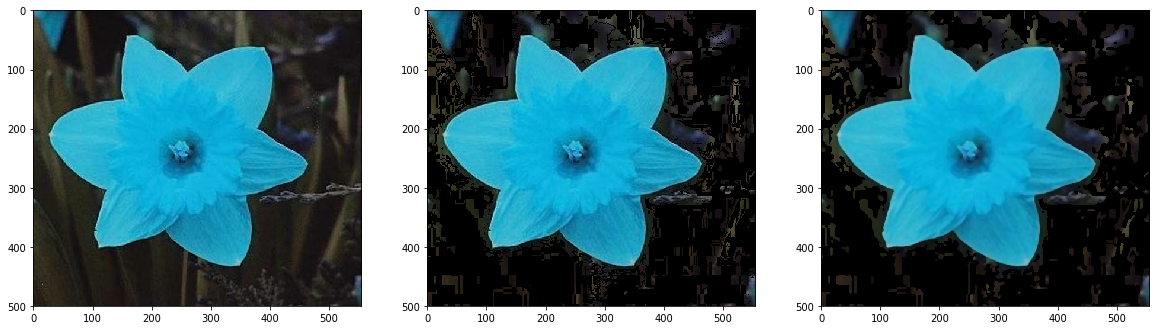

In [10]:
new_img = cv2.cvtColor(filterd_HSV_filter,cv2.COLOR_HSV2BGR)
new_img2 = cv2.medianBlur(new_img,5)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax = fig.add_subplot(1,3,2)
plt.imshow(new_img)
ax = fig.add_subplot(1,3,3)
plt.imshow(new_img2)

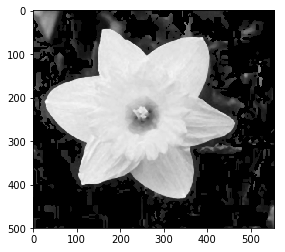

In [11]:
gray = cv2.cvtColor(new_img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [12]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

127.0


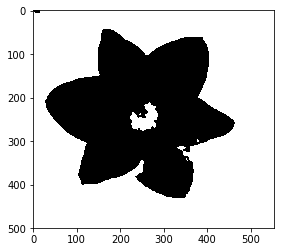

In [13]:
print(ret)
plt.imshow(thresh, cmap='gray')
plt.show()

Number of Contours 8
Height 438, Width 391


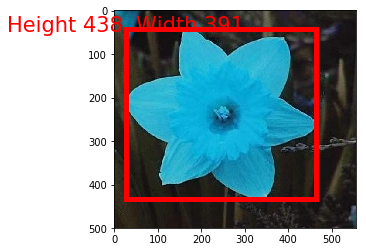

In [15]:
import matplotlib.patches as patches
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours {0}".format(len(cnts)))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

count = 1
for c in cnts:
    # compute the bounding box of the contour and use the
    # bounding box to compute the aspect ratio
    
    #if count == 2:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((h > 300 and w > 300) and (h < img.shape[0] and w < img.shape[1])):
        str_data = "Height {0}, Width {1}".format(w, h) 
        print(str_data)
        # Create a Rectangle patch
        rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='r',facecolor='none')
        plt.text(x, y - 7, str_data, size=len(str_data), ha='center', va='center',
                     color='red' or fc)

        # Add the patch to the Axes
        ax.add_patch(rect)
    
    count = count + 1
    
    
plt.show()

In [23]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg

In [39]:
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

In [29]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


In [32]:
def draw_intercepts(point,angle):
    x1=point[0]
    y1=point[1]
    arrow_angle=angle
    arrow_angle_rad=np.radians(arrow_angle)
    y_intercept=int(y1+((1/np.tan(arrow_angle_rad))*x1))
    x_intercept=int(x1+(np.tan(arrow_angle_rad)*y1))
    return x_intercept, y_intercept
    #cv2.line(img, (x_intercept, 0), (0, y_intercept), [0, 0, 255], 3, cv2.LINE_AA)

In [35]:
def plot_point(point, angle, length):
     '''
     point - Tuple (x, y)
     angle - Angle you want your end point at in degrees.
     length - Length of the line you want to plot.

     Will plot the line on a 10 x 10 plot.
     '''

     # unpack the first point
     x, y = point

     # find the end point
     endy = length * math.sin(math.radians(angle))
     endx = length * math.cos(math.radians(angle))

     # plot the points
     fig = plt.figure()
     ax = plt.subplot(111)
     ax.set_ylim([0, 10])   # set the bounds to be 10, 10
     ax.set_xlim([0, 10])
     return [x, endx], [y, endy]

Number of Contours 8
[[[163  43]]

 [[164  42]]

 [[176  42]]

 ...

 [[157  51]]

 [[157  46]]

 [[160  43]]]
Height 438, Width 391, Area 100189.0, extLeft: (26, 211), extRight: (463, 258), extTop: (164, 42), extBot: (344, 432), Line1: Line2D(), Line2: Line2D()
Angle : 167.86767066194992, Opposite Angle: 12.0, center_x: 76.30813287514319, center_y: 407.2531500572738
-1.1081081081081081
-0.7213114754098361
0.0
0.0


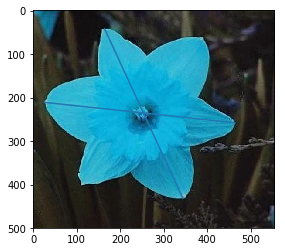

In [43]:
import matplotlib.lines as mlines
img1 = cv2.imread(r'../Storage/flowers_for_petals/42/image_05698.jpg',-1)
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours {0}".format(len(cnts)))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img1)

count = 1
for c in cnts:
    # compute the bounding box of the contour and use the
    # bounding box to compute the aspect ratio
    
    #if count == 2:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((h > 300 and w > 300) and (h < img1.shape[0] and w < img1.shape[1])):
        print(c)
        area = cv2.contourArea(c)
        
        # determine the most extreme points along the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        line1 = mlines.Line2D([extLeft[0],extRight[0]], [extLeft[1],extRight[1]])
        line2 = mlines.Line2D([extTop[0],extBot[0]], [extTop[1],extBot[1]])
        str_data = "Height {0}, Width {1}, Area {2}, extLeft: {3}, extRight: {4}, extTop: {5}, extBot: {6}, Line1: {7}, Line2: {8}".format(w, h, area, extLeft, extRight, extTop, extBot, line1, line2)
        print(str_data)
        ax.add_line(line1)
        ax.add_line(line2)
        
        lineA = [[extLeft[0], extRight[0]], [extLeft[1],extRight[1]]]
        lineB = [extTop[0],extBot[0]], [extTop[1],extBot[1]]
        degree = ang(lineA, lineB)
        opposite_degree = (360 - 2 * degree)//2
        
        center_x, center_y = line_intersection(lineA, lineB)
        print("Angle : {0}, Opposite Angle: {1}, center_x: {2}, center_y: {3}".format(degree, opposite_degree, center_x, center_y))
        
        m1 = slope(extLeft[0], extRight[0], extLeft[1],extRight[1])
        print(m1)
        m2 = slope(extTop[0],extBot[0], extTop[1],extBot[1])
        print(m2)
        tangent = abs((m2 - m1)//(1 + m1 * m2))
        print(tangent)
        degree = math.degrees(math.atan(tangent))
        print(degree)
    count = count + 1
    
    
plt.show()

In [88]:
def distance(x1, y1, x2, y2):
    length = math.sqrt(abs((x1 - x2))**2 + abs((y1 - y2))**2)
    return length

In [89]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return x0, y0

Number of Contours 8
[[[163  43]]

 [[164  42]]

 [[176  42]]

 ...

 [[157  51]]

 [[157  46]]

 [[160  43]]]
Height 438, Width 391, Area 100189.0, extLeft: (26, 211), extRight: (463, 258), extTop: (164, 42), extBot: (344, 432), Line1: Line2D(), Line2: Line2D()
Side 1: 276.1340254296815, Side 2: 150.42606157179014, Side 3: 221.60550534677608
Triangle Area: 16602.233603981906, Contour Area: 100189.0, petals: 6.0


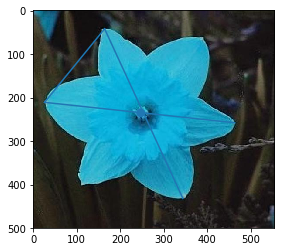

In [90]:
import matplotlib.lines as mlines
import math
img1 = cv2.imread(r'../Storage/flowers_for_petals/42/image_05698.jpg',-1)
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours {0}".format(len(cnts)))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img1)

count = 1
for c in cnts:
    # compute the bounding box of the contour and use the
    # bounding box to compute the aspect ratio
    
    #if count == 2:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((h > 300 and w > 300) and (h < img1.shape[0] and w < img1.shape[1])):
        print(c)
        contour_area = cv2.contourArea(c)
        
        # determine the most extreme points along the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        line1 = mlines.Line2D([extLeft[0],extRight[0]], [extLeft[1],extRight[1]])
        line2 = mlines.Line2D([extTop[0],extBot[0]], [extTop[1],extBot[1]])
        line3 = mlines.Line2D([extLeft[0], extTop[0]], [extLeft[1], extTop[1]])
        str_data = "Height {0}, Width {1}, Area {2}, extLeft: {3}, extRight: {4}, extTop: {5}, extBot: {6}, Line1: {7}, Line2: {8}".format(w, h, contour_area, extLeft, extRight, extTop, extBot, line1, line2)
        print(str_data)
        ax.add_line(line1)
        ax.add_line(line2)
        ax.add_line(line3)
        
        side1 = distance(extLeft[0],extRight[0], extLeft[1], extRight[1])
        side2 = distance(extTop[0],extBot[0], extTop[1], extBot[1])
        side3 = distance(extLeft[0], extTop[0], extLeft[1], extTop[1])
        str_side = "Side 1: {0}, Side 2: {1}, Side 3: {2}".format(side1, side2, side3)
        print(str_side)
        semi_perimeter = (side1 + side2 + side3)//2
        area = math.sqrt(semi_perimeter*(semi_perimeter-side1)*(semi_perimeter-side2)*(semi_perimeter-side3))
        
        M = cv2.moments(c)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center_circle = plt.Circle((cx, cy), 10)
        ax.add_patch(center_circle)
                
        petals = contour_area//area
        print("Triangle Area: {0}, Contour Area: {1}, petals: {2}".format(area, contour_area, petals))
        
    count = count + 1
    
    
plt.show()

area 2800.0 area 325227.5 

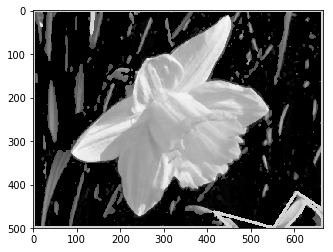

In [41]:
for cnt in cnts : 
    area = cv2.contourArea(cnt) 
    #if area == 2800.0:
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(gray, [approx], 0, (200, 200, 200), 5) 
    print("area {0}".format(area), end=' ')

plt.imshow(gray, cmap='gray')
plt.show()

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(opening)
plt.show()
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

from skimage import io, filters, morphology, measure
from skimage.measure import label,  regionprops
from skimage.filters import sobel
from skimage.draw import polygon

import scipy
import scipy.io
from scipy import ndimage

# Find contours at a constant value of 0.8
contours = measure.find_contours(gray, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(gray, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

#im = np.reshape(new_img2*255, (256, 256))
val = filters.threshold_otsu(gray)
drops = ndimage.binary_fill_holes(gray < val)
print(drops.shape)
plt.imshow(drops, cmap='gray')
plt.show()

label_image = measure.label(drops)
regions = regionprops(label_image)
print("Number of regions {0}".format(len(regions)))
#coords
max_region = 0
img = np.zeros(drops.shape, dtype=np.uint8)
for re in regions:
    print(re.bbox_area, end=' ')

label_image = measure.label(drops)
regions = regionprops(label_image)
print("Number of regions {0}".format(len(regions)))
#coords
max_region = 0
img = np.zeros(drops.shape, dtype=np.uint8)
for re in regions:
    print(re.coords, end= ' ')
    max_region = max_region + 1
    if max_region == 1:
        #print(re.coords, end= ' ')
        points_r, points_c = re.coords[:, 0], re.coords[:, 1]
        interior_r, interior_c = polygon(points_r, points_c)
        img[interior_r, interior_c] = 1
        print(img)
        plt.imshow(img)
        plt.show()

Number of Contours 8
[[[163  43]]

 [[164  42]]

 [[176  42]]

 ...

 [[157  51]]

 [[157  46]]

 [[160  43]]]
Height 438, Width 391, Area 100189.0, extLeft: (26, 211), extRight: (463, 258), extTop: (164, 42), extBot: (344, 432), Line1: Line2D(),         Line2: Line2D(), circle_area: 153438.52679397908, ellipse_area: 428624.6480842275, rect_area: 171258
Side 1: 276.1340254296815, Side 2: 150.42606157179014, Side 3: 221.60550534677608
Triangle Area: 16602.233603981906, Contour Area: 100189.0, petals: 8


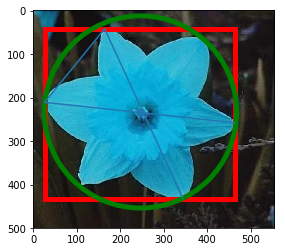

In [100]:
import matplotlib.lines as mlines
import math
img1 = cv2.imread(r'../Storage/flowers_for_petals/42/image_05698.jpg',-1)
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours {0}".format(len(cnts)))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img1)

count = 1
for c in cnts:
    # compute the bounding box of the contour and use the
    # bounding box to compute the aspect ratio
    
    #if count == 2:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((h > 300 and w > 300) and (h < img1.shape[0] and w < img1.shape[1])):
        print(c)
        contour_area = cv2.contourArea(c)
        rect_area = w * h
        
        
        rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        
        (min_cx,min_cy),radius = cv2.minEnclosingCircle(c)
        center = (int(min_cx),int(min_cy))
        radius = int(radius)
        circle = patches.Circle((min_cx, min_cy), radius=radius, linewidth=5, edgecolor='g',facecolor='none')
        ax.add_patch(circle)
        circle_area = math.pi * radius * radius
        
        (x, y), (MA, ma), angle = cv2.fitEllipse(c)
        ellipse_area = math.pi * MA * ma
        
        # determine the most extreme points along the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        line1 = mlines.Line2D([extLeft[0],extRight[0]], [extLeft[1],extRight[1]])
        line2 = mlines.Line2D([extTop[0],extBot[0]], [extTop[1],extBot[1]])
        line3 = mlines.Line2D([extLeft[0], extTop[0]], [extLeft[1], extTop[1]])
        str_data = "Height {0}, Width {1}, Area {2}, extLeft: {3}, extRight: {4}, extTop: {5}, extBot: {6}, Line1: {7}, \
        Line2: {8}, circle_area: {9}, ellipse_area: {10}, rect_area: {11}".format(w, h, contour_area, extLeft, extRight, extTop, extBot, line1, line2, \
                                             circle_area, ellipse_area, rect_area)
        print(str_data)
        ax.add_line(line1)
        ax.add_line(line2)
        ax.add_line(line3)
        
        side1 = distance(extLeft[0],extRight[0], extLeft[1], extRight[1])
        side2 = distance(extTop[0],extBot[0], extTop[1], extBot[1])
        side3 = distance(extLeft[0], extTop[0], extLeft[1], extTop[1])
        str_side = "Side 1: {0}, Side 2: {1}, Side 3: {2}".format(side1, side2, side3)
        print(str_side)
        semi_perimeter = (side1 + side2 + side3)//2
        area = math.sqrt(semi_perimeter*(semi_perimeter-side1)*(semi_perimeter-side2)*(semi_perimeter-side3))
        
        M = cv2.moments(c)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center_circle = plt.Circle((cx, cy), 10)
        ax.add_patch(center_circle)
                
        petals = math.ceil((circle_area *0.85)/area)
        print("Triangle Area: {0}, Contour Area: {1}, petals: {2}".format(area, contour_area, petals))
        
    count = count + 1
    
    
plt.show()